100%|██████████| 47585/47585 [00:23<00:00, 2001.15it/s]


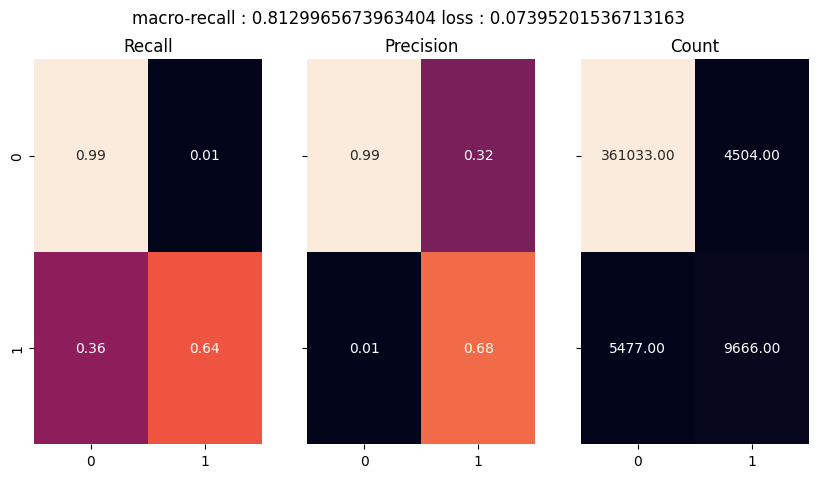

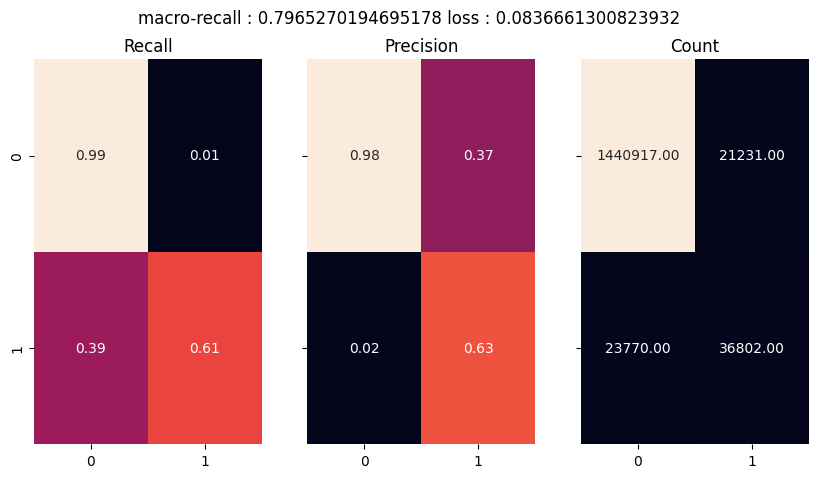

In [12]:
_,_,y_pred = test_evaluation(trainloader,model,criterion)
_,_,y_pred = test_evaluation(devloader,model,criterion)
# train : .0749 
# dev : .0785

In [ ]:
idx = 0

holdoutloader = DataLoader(TensorDataset(*load_and_window_nursing_by_index(idx,window_size=window_size)),batch_size=32,shuffle=False)
loss,y_true,y_pred = test_evaluation(holdoutloader,model,criterion)
X,y = load_nursing_by_index(idx)
df = pd.DataFrame(X.numpy())
df['y_pred'] = torch.cat([torch.zeros(window_size//2),y_pred.flatten().round(),torch.zeros(window_size//2)])*10
df['y_true'] = y*10
fig = px.line(df)
fig.show(renderer='browser')

100%|██████████| 71/71 [00:05<00:00, 13.32it/s] 


tensor(0.7228, dtype=torch.float64)
tensor(0.1286, dtype=torch.float64)


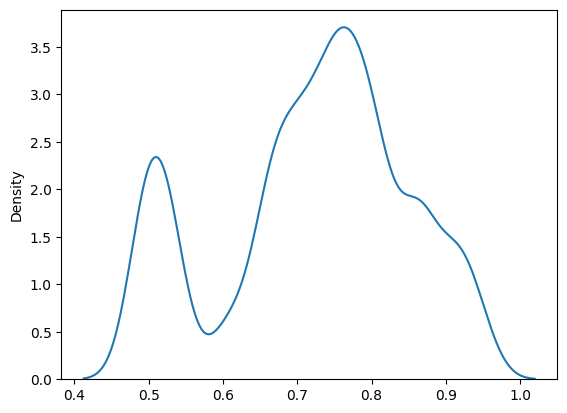

In [73]:
f1i = []
for idx in tqdm(range(71)):
    if(idx in skip_idx or idx in train_idx):
        continue
    X,y = load_and_window_nursing_by_index(idx,window_size=window_size)
    y_pred = torch.sigmoid(model(X.cuda())).round().detach().cpu()
    f1i.append(f1_score(y_true=y,y_pred=y_pred,average='macro'))

sns.kdeplot(f1i,bw_adjust=.4)
print(torch.tensor(f1i).mean()) #.7122
print(torch.tensor(f1i).std()) #.1294
